# figure5c: comparison of kcat param between natural and generated

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
log_dir = "../../../genzyme_ngs/outputs/220822/"
!ls {log_dir}*csv

../../../genzyme_ngs/outputs/220822/cleave.csv
../../../genzyme_ngs/outputs/220822/depth.csv
../../../genzyme_ngs/outputs/220822/kinetics_param_dup1.csv
../../../genzyme_ngs/outputs/220822/kinetics_param_dup2.csv
../../../genzyme_ngs/outputs/220822/rate_cleaved.csv
../../../genzyme_ngs/outputs/220822/uncleave.csv


In [3]:
df = pd.read_csv(log_dir + "kinetics_param_dup1.csv")
df_nat = df[df["Unnamed: 0"].str.contains("/")]
df_gen = df[df["Unnamed: 0"].str.contains("gen")]

print("#seq of natural:", df_nat.shape[0])
print("#seq of generated:", df_gen.shape[0])

#seq of natural: 761
#seq of generated: 1000


p-value: 5.222849228997338e-45
corr: 232209.0


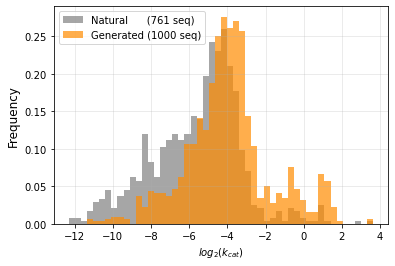

In [4]:
_, bins, _ = plt.hist(np.log2(df_nat["kcat_mean_1st"]), bins=50, alpha=0.7, label=f"Natural      ({df_nat.shape[0]} seq)", density=True, color = "gray")
plt.hist(np.log2(df_gen["kcat_mean_1st"]), bins=bins, alpha=0.7, label=f"Generated ({df_gen.shape[0]} seq)", density=True, color = "darkorange")
plt.grid(alpha = 0.3)
plt.xlabel("$log_2(k_{cat})$")
plt.ylabel("Frequency", fontsize=12)
plt.legend()
# plt.savefig("../../outputs/figures/figure5d.png", dpi=300, transparent=True)
plt.savefig("../../outputs/figures/figure5d.pdf", transparent=True)


from scipy.stats import mannwhitneyu
corr, p = mannwhitneyu(df_nat["kcat_mean_1st"], df_gen["kcat_mean_1st"])
print(f"p-value: {p}")
print(f"corr: {corr}")


# supplementary figure 6a: 

In [5]:
df_dup1 = pd.read_csv(log_dir + "kinetics_param_dup1.csv", index_col=0)
df_dup2 = pd.read_csv(log_dir + "kinetics_param_dup2.csv", index_col=0)
print(df_dup1.shape)
print(df_dup2.shape)
df_dup1.head(2)

(1861, 12)
(1858, 12)


,kcat_mean_1st,kcat_std_1st,kcat_5%_1st,kcat_95%_1st,tbase_mean_1st,tbase_std_1st,tbase_5%_1st,tbase_95%_1st,_RETURN_mean_1st,_RETURN_std_1st,_RETURN_5%_1st,_RETURN_95%_1st
JOTN01000018.1/8921-9077_wild_15,0.005023,0.000205,0.004684,0.005355,7.562647,0.546541,6.666773,8.444406,0.037272,0.003063,0.032514,0.042408
FR903934.1/5471-5622,0.008449,0.006751,0.002068,0.020488,1.089378,1.096704,0.177480,3.323710,0.008799,0.012180,0.000754,0.029142


In [6]:
idx_common = list(set(df_dup2.index) & set(df_dup1.index))
len(idx_common)

1857

/Users/sumishunsuke/opt/miniconda3/envs/genzyme/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-20.0, 5.0)

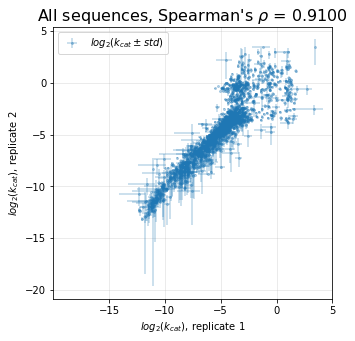

In [7]:
from scipy.stats import spearmanr
data_1 = df_dup1["kcat_mean_1st"].loc[idx_common]
data_2 = df_dup2["kcat_mean_2nd"].loc[idx_common]

# scatter plot with std error
plt.figure(figsize=(5, 5))
plt.errorbar(
    x = np.log2(data_1),
    y = np.log2(data_2),
    xerr = [
        np.log2(data_1) - np.log2(data_1 - df_dup1["kcat_std_1st"].loc[idx_common]),
        np.log2(data_1 + df_dup1["kcat_std_1st"].loc[idx_common]) - np.log2(data_1)
        ],
    yerr = [
        np.log2(data_2) - np.log2(data_2 - df_dup2["kcat_std_2nd"].loc[idx_common]),
        np.log2(data_2 + df_dup2["kcat_std_2nd"].loc[idx_common]) - np.log2(data_2)
        ],
        label = "$log_2(k_{cat} \\pm std)$",

    # xerr = [
    #     np.log2(data_1) - np.log2(df_dup1["kcat_5%_1st"].loc[idx_common]),
    #     np.log2(df_dup1["kcat_95%_1st"].loc[idx_common]) - np.log2(data_1),
    # ],
    # yerr = [
    #     np.log2(data_2) - np.log2(df_dup2["kcat_5%_2nd"].loc[idx_common]),
    #     np.log2(df_dup2["kcat_95%_2nd"].loc[idx_common]) - np.log2(data_2)
    # ],

    marker = ".", markersize = 4, linestyle = "None", alpha = 0.3
    )
corr, p = spearmanr(data_1, data_2)
plt.title(f"All sequences, Spearman's $\\rho$ = {corr:.4f}", fontsize = 16)
plt.xlabel("$log_2(k_{cat})$, replicate 1")
plt.ylabel("$log_2(k_{cat})$, replicate 2")
plt.legend()
plt.xticks([-15, -10, -5, 0, 5])
plt.grid(alpha = 0.3)
plt.xlim([-20, 5])
# plt.savefig("../../outputs/figures/supp_figure6a.png", dpi=300, transparent=True)
# plt.savefig("../../outputs/figures/supp_figure6a.pdf", transparent=True)

# supplementary figure 6b

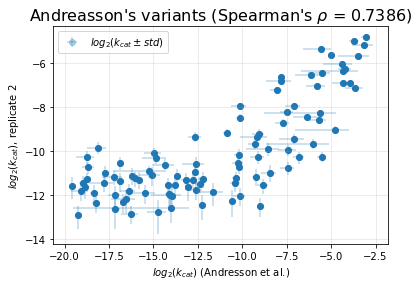

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

log_dir = "../../../genzyme_ngs/outputs/220822/"
df_ngs = pd.read_csv(log_dir + "kinetics_param_dup2.csv", index_col = 0)
df_ngs_andresson = df_ngs.filter(like = "seqid", axis = 0).sort_values(by = "kcat_mean_2nd")
idx_ngs_andresson = [int(idx.split("-")[1].split("_")[0]) for idx in df_ngs_andresson.index]

# df_ngs_andresson.head(3)

df_ref_andreasson = pd.read_csv("/Users/sumishunsuke/Desktop/RNA/genzyme/datasets/ForDMSdata/RF00234/activity/additional_data_andearson_2020/glmS ribozyme RNA array_Source Data/dataframe1_kobs_kcat_KM_rescues.csv", index_col = 0)
seqid2kcat = df_ref_andreasson["kcat"].dropna().to_dict()
seqid2kcatstd = df_ref_andreasson["kcat_stErr"].dropna().to_dict()

# seqid2kcat[10337]
# plt.scatter(
#     idx_ngs_andresson,
#     [seqid2kcat[idx] for idx in idx_ngs_andresson]
# )

from scipy.stats import spearmanr

corr, p = spearmanr(
    np.log2([seqid2kcat[idx] for idx in idx_ngs_andresson]),
    np.log2(df_ngs_andresson["kcat_mean_2nd"])
)
plt.scatter(
    np.log2([seqid2kcat[idx] for idx in idx_ngs_andresson]),
    np.log2(df_ngs_andresson["kcat_mean_2nd"])
)

plt.errorbar(
    x = np.log2([seqid2kcat[idx] for idx in idx_ngs_andresson]),
    y = np.log2(df_ngs_andresson["kcat_mean_2nd"]),
    xerr= [
        np.log2([seqid2kcat[idx] for idx in idx_ngs_andresson]) - np.log2([seqid2kcat[idx] - seqid2kcatstd[idx] for idx in idx_ngs_andresson]),
        np.log2([seqid2kcat[idx]+seqid2kcatstd[idx] for idx in idx_ngs_andresson]) - np.log2([seqid2kcat[idx] for idx in idx_ngs_andresson]),
    ],
    yerr = [
        np.log2(df_ngs_andresson["kcat_mean_2nd"]) - np.log2(df_ngs_andresson["kcat_mean_2nd"] - df_ngs_andresson["kcat_std_2nd"]),
        np.log2(df_ngs_andresson["kcat_mean_2nd"] + df_ngs_andresson["kcat_std_2nd"]) - np.log2(df_ngs_andresson["kcat_mean_2nd"]),
    ],
    fmt = "o", alpha = 0.3, label ="$log_2({k_{cat} \pm std})$"
)

plt.xlabel("$log_2(k_{cat})$ (Andresson et al.)")
plt.ylabel("$log_2(k_{cat})$, replicate 2")
plt.title(f"Andreasson's variants (Spearman's $\\rho$ = {corr:.4f})", fontsize = 16)
plt.grid(alpha = 0.3)
plt.legend()
# plt.savefig("../../outputs/figures/supp_figure6bottom.png", dpi=300, transparent=True)
# plt.savefig("../../outputs/figures/supp_figure6bottom.pdf", transparent=True)



In [ ]:
from scipy.stats import spearmanr

corr, p = spearmanr(
    np.log2([seqid2kcat[idx] for idx in idx_ngs_andresson]),
    np.log2(df_ngs_andresson["kcat_mean_1st"])
)
plt.scatter(
    np.log2([seqid2kcat[idx] for idx in idx_ngs_andresson]),
    np.log2(df_ngs_andresson["kcat_mean_1st"])
)

plt.errorbar(
    x = np.log2([seqid2kcat[idx] for idx in idx_ngs_andresson]),
    y = np.log2(df_ngs_andresson["kcat_mean_1st"]),
    xerr= [
        np.log2([seqid2kcat[idx] for idx in idx_ngs_andresson]) - np.log2([seqid2kcat[idx] - seqid2kcatstd[idx] for idx in idx_ngs_andresson]),
        np.log2([seqid2kcat[idx]+seqid2kcatstd[idx] for idx in idx_ngs_andresson]) - np.log2([seqid2kcat[idx] for idx in idx_ngs_andresson]),
    ],
    yerr = [
        np.log2(df_ngs_andresson["kcat_mean_1st"]) - np.log2(df_ngs_andresson["kcat_mean_1st"] - df_ngs_andresson["kcat_std_1st"]),
        np.log2(df_ngs_andresson["kcat_mean_1st"] + df_ngs_andresson["kcat_std_1st"]) - np.log2(df_ngs_andresson["kcat_mean_1st"]),
    ],
    fmt = "o", alpha = 0.3, label ="$log_2({k_{cat} \pm std})$"
)

plt.xlabel("$log_2(k_{cat})$ (Andresson et al.)")
plt.ylabel("$log_2(k_{cat})$, replicate 1")
plt.title(f"Andreasson's variants (Spearman's $\\rho$ = {corr:.4f})", fontsize = 16)
plt.grid(alpha = 0.3)
plt.legend()
# plt.savefig("../../outputs/figures/supp_figure6upper.png", dpi=300, transparent=True)
# plt.savefig("../../outputs/figures/supp_figure6upper.pdf", transparent=True)


# supplementary figure 6c: 

In [12]:
from scipy.stats import mannwhitneyu

df = pd.read_csv(log_dir + "kinetics_param_dup2.csv")
df_nat = df[df["Unnamed: 0"].str.contains("/")]
df_gen = df[df["Unnamed: 0"].str.contains("gen")]

corr, p = mannwhitneyu(df_nat["kcat_mean_2nd"], df_gen["kcat_mean_2nd"])
print(f"p-value: {p}")
print(f"corr: {corr}")



p-value: 5.045561721883115e-26
corr: 268578.0


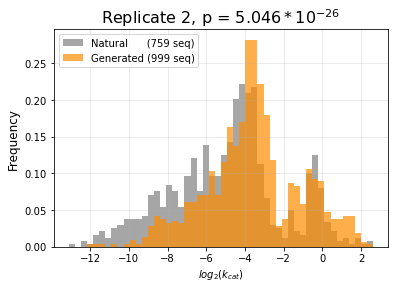

In [13]:
_, bins, _ = plt.hist(np.log2(df_nat["kcat_mean_2nd"]), bins=50, alpha=0.7, label=f"Natural      ({df_nat.shape[0]} seq)", density=True, color = "gray")
plt.hist(np.log2(df_gen["kcat_mean_2nd"]), bins=bins, alpha=0.7, label=f"Generated ({df_gen.shape[0]} seq)", density=True, color = "darkorange")
plt.grid(alpha = 0.3)
plt.xlabel("$log_2(k_{cat})$")
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.title("Replicate 2, p = $5.046*10^{-26}$", fontsize = 16)
# plt.savefig("../../outputs/figures/supp_figure6c.pdf", transparent=True)


